![](images/logo-pandas.png)

# Background

Pandas is built on top of Numpy and brings lots of new bells and whistles to Numpy arrays.

You pay for extra capabilities with extra overhead.

Pandas provides the following basic functionality:

- self-describing data structures
- data loaders for many formats
- plotting functions and
- basic analytical functions.

Works nicely with many other packages:

- statsmodels
- Bokeh
- Plotly
- Seaborn
- GeoPandas

This is the outline of what we'll cover in this module:

1. The `Series` Class
    - Index
    - Slicing
    - Plotting
2. The `DataFrame` Class
    - Creating from a Dictionary
    - Creating from an Array
    - Creating from CSV and XLS Files

Load the library. If you don't already have it installed then consider installing the [Anaconda](https://anaconda.org/) distribution.

In [1]:
import pandas as pd

Add a couple of other useful libraries.

In [2]:
import re, os, glob

import numpy as np

rng = np.random.RandomState(1777)
random_state = 1777

%matplotlib inline
import matplotlib.pyplot as plt

# Make default size of figures larger.

plt.rcParams['figure.figsize'] = (12, 8)

Control how Pandas renders a DataFrame preview.

In [3]:
pd.set_option("display.max_rows", 12)

# What's Possible?

Pandas exposes a wide range of functionality for working with data:

- reading data from a variety of formats
- arranging data into neat tabular structures
- applying operations across rows and down columns
- selecting ("slicing") subsets of data
- dealing with missing data
- working with groups within the data
- joining datasets
- writing data to a variety of formats
- visualisation.

# Series Objects

A `Series` represents a one-dimensional array or vector.

There are several ways to initialise a `Series` object.

In [4]:
# Initialise with a scalar.
#
pd.Series(42)

0    42
dtype: int64

In [5]:
# Initialise with a list.
#
pd.Series([42, 13, 2, 69])

0    42
1    13
2     2
3    69
dtype: int64

In [6]:
# Initialise with a dictionary.
#
pd.Series({'a': 42, 'b': 13, 'c': 2})

a    42
b    13
c     2
dtype: int64

Since Pandas is built on top of Numpy it's not surprising that you can also initialise a `Series` from a Numpy array.

In [7]:
# Initialise with a Numpy array.
#
pd.Series(np.random.randn(5))

0    0.837575
1   -0.467582
2    0.256081
3   -0.047511
4    1.584027
dtype: float64

Let's create a few more `Series` that we'll use further below.

In [8]:
age = pd.Series(
    [35, 29, 27, 29, 18, 21],
    index=['Bob', 'Alice', 'Peggy', 'Victor', 'Frank', 'Erin']
)

In [9]:
height = pd.Series({
    'Bob': 180.3,
    'Alice': 157.5,
    'Victor': 162.6,
    'Frank': 190.5,
    'Erin': 148.3
})

mass = pd.Series({
    'Bob': 81.2,
    'Alice': 50.7,
    'Victor': 72.1,
    'Frank': 88.5,
    'Erin': 51.3
})

## Attributes & Methods

A selection of useful attributes on `Series` objects:

- `dtypes`: type of the data
- `iloc`: integer based indexing
- `itemsize`: size of the data type
- `loc`: label based indexing
- `nbytes`: number of bytes occupied by data
- `ndim`: number of dimensions
- `shape`: dimensions
- `size`: number of elements
- `values`: data as a Numpy array

A selection of useful methods on `Series` objects (there are *many* more!):

- `all()`: are all elements `True`
- `any()`: are any elements `True`
- `apply()`
- `astype()`
- `copy()`
- `count()`: number of non-missing elements
- `dropna()`
- `fillna()`
- `get()`
- `head()`
- `isin()`
- `isna()` and `isnull()`
- `reindex()`: apply a new index
- `reindex_like()`
- `replace()`
- `sort_index()`: sort by label
- `sort_values()`: sort by value
- `tail()`
- `unique()`

## Data Types

A `Series` has a data type which can be accessed via the `dtypes` attribute.

In [10]:
pd.Series([1, 2, 3]).dtypes

dtype('int64')

In [11]:
pd.Series(['a', 'b', 'c']).dtypes

dtype('O')

In [12]:
pd.Series([1, 2, 3, 'a', 'b', 'c']).dtypes

dtype('O')

Whereas a list can hold more than one type of data, a `Series` can hold data of only a single type. Type coercion/promotion is applied to map all data to a single type.

In [13]:
pd.Series([1, 2, 3, 6., 'foo']).dtypes

dtype('O')

These are the most common values for `dtypes`:
    
- `float`
- `int`
- `bool`
- `datetime`
- `timedelta`
- `category`
- `object` or `O`.

**Exercises:**

1. Extract the index for `age` and `height`.
2. Find the data types for `age` and `height`.

## Access

There are a variety of ways that you can access elements in a `Series` object.

In [14]:
age

Bob       35
Alice     29
Peggy     27
Victor    29
Frank     18
Erin      21
dtype: int64

Simply indexing with the `[]` operator calls the `__getitem__` method. You can use both labels and positions.

In [15]:
age['Alice']

29

In [16]:
age[1]

29

The `loc` and `iloc` attributes provide unambiguous ways to index into a `Series`.

In [17]:
age.loc[age == 29]

Alice     29
Victor    29
dtype: int64

In [18]:
age.loc['Alice']

29

A list of labels also works.

In [19]:
age.loc[['Alice', 'Bob']]

Alice    29
Bob      35
dtype: int64

A slice object also works.

In [20]:
age.loc['Bob':'Peggy']

Bob      35
Alice    29
Peggy    27
dtype: int64

A Boolean array also works. This can be used to subset a `Series` using a logical predicate.

In [21]:
age.loc[[True, False, True, False, True, False]]

Bob      35
Peggy    27
Frank    18
dtype: int64

### Position

In [22]:
age.iloc[1]

29

A list of indices also works.

In [23]:
age.iloc[[1, 3, 0]]

Alice     29
Victor    29
Bob       35
dtype: int64

A slice object also works.

In [24]:
age.iloc[0:3]

Bob      35
Alice    29
Peggy    27
dtype: int64

A Boolean array also works. This can be used to subset a `Series` using a logical predicate.

In [25]:
age.iloc[[True, False, True, False, True, False]]

Bob      35
Peggy    27
Frank    18
dtype: int64

## Missing Data

Identify missing data using either `isnull()` or `isna()`.

In [26]:
height.iloc[0] = float('nan')

In [27]:
height.isnull()

Alice      True
Bob       False
Erin      False
Frank     False
Victor    False
dtype: bool

In [28]:
height.isna()

Alice      True
Bob       False
Erin      False
Frank     False
Victor    False
dtype: bool

The `dropna()` method will only return the non-missing elements.

In [29]:
height.dropna()

Bob       180.3
Erin      148.3
Frank     190.5
Victor    162.6
dtype: float64

The `fillna()` method provides several options for filling in missing elements.

In [30]:
height.fillna(-1)

Alice      -1.0
Bob       180.3
Erin      148.3
Frank     190.5
Victor    162.6
dtype: float64

## Operations

### Arithmetic

Arithmetic operations between `Series` objects align values based on index. The index of the result is the sorted union of the two indexes.

In [31]:
age

Bob       35
Alice     29
Peggy     27
Victor    29
Frank     18
Erin      21
dtype: int64

In [32]:
height

Alice       NaN
Bob       180.3
Erin      148.3
Frank     190.5
Victor    162.6
dtype: float64

In [33]:
height / age

Alice           NaN
Bob        5.151429
Erin       7.061905
Frank     10.583333
Peggy           NaN
Victor     5.606897
dtype: float64

**Exercises:**

1. Use `height` and `mass` to calculate [Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index) (BMI).

### Logic

In [34]:
tall = height > 180
tall

Alice     False
Bob        True
Erin      False
Frank      True
Victor    False
dtype: bool

Check if all of the people are tall.

In [35]:
tall.all()

False

Check if any of the people are tall.

In [36]:
tall.any()

True

**Exercises:**

1. Are all of the `age` less than 50?
2. Are any of the `age` greater than 30?

### Sorting

In [37]:
age

Bob       35
Alice     29
Peggy     27
Victor    29
Frank     18
Erin      21
dtype: int64

Sort according to index.

In [38]:
age.sort_index()

Alice     29
Bob       35
Erin      21
Frank     18
Peggy     27
Victor    29
dtype: int64

Sort according to values.

In [39]:
age.sort_values()

Frank     18
Erin      21
Peggy     27
Alice     29
Victor    29
Bob       35
dtype: int64

### Functional

In [40]:
height.apply(np.sqrt)

Alice           NaN
Bob       13.427584
Erin      12.177849
Frank     13.802174
Victor    12.751471
dtype: float64

### Plotting

Let's create another `Series` object. This time we'll apply the index when we create the object.

In [41]:
STEPS = 365*10
#
random_steps = pd.Series(np.random.randn(STEPS), index=pd.date_range('2000-01-01', periods=STEPS))

We'll use one of the numerous methods on the `Series` object to convert to a cumulative sum.

In [42]:
random_walk = random_steps.cumsum()

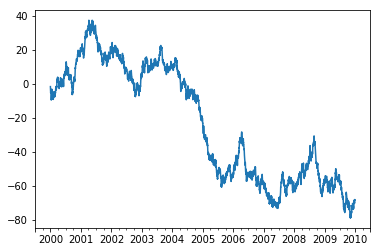

In [43]:
random_walk.plot();

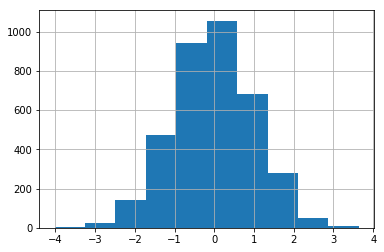

In [44]:
random_steps.hist();

# DataFrame Objects

## Attributes & Methods

A selection of useful attributes on `DataFrame` objects:

- `columns`: column names
- `dtypes`
- `iloc`
- `index`: row names
- `loc`
- `shape`
- `values`

A selection of useful methods on `DataFrame` objects (there are *many* more!):

- `apply()` and `applymap()`
- `copy()`
- `head()`
- `idxmax()` and `idxmin()`: locations of maximum or minimum values
- `info()`
- `isin()`
- `max()` and `min()`
- `reindex()`: directly manipulate index
- `reset_index()`: convert index to column
- `set_index()`: specify a column to be used as the index
- `tail()`

## Creating...

### from Series

When you construct a `DataFrame` object from a collection of `Series` objects, the `Series` are aligned using their indexes.

In [45]:
# Initialize a DataFrame with a dictionary of Series objects.
#
people = pd.DataFrame({
    'age': pd.Series([35, 29, 27, 29, 18, 21], index=['Bob', 'Alice', 'Peggy', 'Victor', 'Frank', 'Erin']),
    'height': pd.Series({'Bob': 180.3, 'Alice': 157.5, 'Victor': 162.6, 'Frank': 190.5, 'Erin': 148.3}),
    'mass': pd.Series({'Bob': 81.2, 'Alice': 50.7, 'Victor': 72.1, 'Frank': 88.5, 'Erin': 51.3})
})
people

,age,height,mass
Alice,29,157.5,50.7
Bob,35,180.3,81.2
Erin,21,148.3,51.3
Frank,18,190.5,88.5
Peggy,27,NaN,NaN
Victor,29,162.6,72.1


Where did the `NaN` values come from?

In [46]:
type(people)

pandas.core.frame.DataFrame

Two elementary attributes of a `DataFrame` are `shape` and `dtypes`.

In [47]:
# Dimensions.
#
people.shape

(6, 3)

In [48]:
# Data type of each column.
#
people.dtypes

age         int64
height    float64
mass      float64
dtype: object

We can also extract the row names (index) and column names.

In [49]:
people.index

Index(['Alice', 'Bob', 'Erin', 'Frank', 'Peggy', 'Victor'], dtype='object')

In [50]:
people.columns

Index(['age', 'height', 'mass'], dtype='object')

### from Lists

A `DataFrame` object can also be populated dictionaries. In this case each of the elements of the dictionary becomes a column in the table.

In [51]:
G8 = pd.DataFrame(
    {
        'country': ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'Russia',
                    'UK',  'USA'],
        'capital': ['Ottawa', 'Paris', 'Berlin', np.NaN, 'Tokyo', np.NaN, 'London', 'Washington, D.C.'],
        'continent': ['North America', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Europe', 'North America'],
        'area': [9093507, 640427, 348672, 294140, 364485, 16377742, 241930, 9147593]
    }
)
G8

,area,capital,continent,country
0,9093507,Ottawa,North America,Canada
1,640427,Paris,Europe,France
2,348672,Berlin,Europe,Germany
3,294140,NaN,Europe,Italy
4,364485,Tokyo,Asia,Japan
5,16377742,NaN,Asia,Russia
6,241930,London,Europe,UK
7,9147593,"Washington, D.C.",North America,USA


Note that the columns are sorted alphabetically.

An integer index is created by default.

In [52]:
G8.index

RangeIndex(start=0, stop=8, step=1)

This attribute is writable and we can use it to update the index.

In [53]:
G8.index = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'RUS', 'GBR', 'USA']
G8

,area,capital,continent,country
CAN,9093507,Ottawa,North America,Canada
FRA,640427,Paris,Europe,France
DEU,348672,Berlin,Europe,Germany
ITA,294140,NaN,Europe,Italy
JPN,364485,Tokyo,Asia,Japan
RUS,16377742,NaN,Asia,Russia
GBR,241930,London,Europe,UK
USA,9147593,"Washington, D.C.",North America,USA


### from Array

The `DataFrame` class is built on top of the NumPy array. So it stands to reason that you can create a `DataFrame` directly from an array.

In [54]:
# Create a vector of random integers, then reshape into a 4x4 array.
#
random_integers = rng.randint(1, 10, size = 16).reshape(4, 4)

In [55]:
type(random_integers)

numpy.ndarray

In [56]:
random_integers

array([[6, 5, 1, 7],
       [5, 9, 5, 4],
       [2, 9, 5, 8],
       [7, 4, 9, 1]])

Convert the array into a `DataFrame`.

In [57]:
random_integers = pd.DataFrame(random_integers, columns=['a', 'b', 'c', 'd'])

In [58]:
random_integers

,a,b,c,d
0,6,5,1,7
1,5,9,5,4
2,2,9,5,8
3,7,4,9,1


Convert the `DataFrame` back into an array (there are two ways to do this!).

In [59]:
random_integers.as_matrix()

array([[6, 5, 1, 7],
       [5, 9, 5, 4],
       [2, 9, 5, 8],
       [7, 4, 9, 1]])

In [60]:
random_integers.values

array([[6, 5, 1, 7],
       [5, 9, 5, 4],
       [2, 9, 5, 8],
       [7, 4, 9, 1]])

Here's another example of creating a `DataFrame` from an array, but this time providing both an index and column names.

In [61]:
pd.DataFrame(
    rng.randn(6, 3),
    index = pd.date_range('20180101', periods = 6),
    columns = ['C', 'B', 'A']
)

,C,B,A
2018-01-01,-0.312921,-0.037683,-1.063510
2018-01-02,0.272221,0.592422,0.377963
2018-01-03,-0.075854,-1.012524,-0.687636
2018-01-04,-0.674134,-0.787498,1.134108
2018-01-05,0.180611,0.711901,0.292765
2018-01-06,-0.026092,-0.316140,1.612045


### from DataFrame

We can create new `DataFrame` objects and, in the process, re-arrange the data.

In [62]:
pd.DataFrame(random_integers, index=[3, 2, 1, 0])

,a,b,c,d
3,7,4,9,1
2,2,9,5,8
1,5,9,5,4
0,6,5,1,7


In [63]:
pd.DataFrame(random_integers, index=[3, 2, 0])

,a,b,c,d
3,7,4,9,1
2,2,9,5,8
0,6,5,1,7


In [64]:
pd.DataFrame(random_integers, columns=['b', 'a'])

,b,a
0,5,6
1,9,5
2,9,2
3,4,7


### from File

Pandas can read data from a variety of file formats:

- `read_table()`: delimited files
- `read_clipboard()`: parse text from the clipboard through `read_table()`
- `read_excel()`: Excel sheets
- `read_json()`: JSON
- `read_html()`: HTML (extracts multiple tables into a list of `DataFrame` objects)
- `read_hdf()`: HDF
- `read_gbq()`: Google BigQuery
- `read_sql_table()` and `read_sql_query()`: SQL database
- `read_stata()`: STATA
- `read_sas()`: SAS
- `read_parquet()`: [Parquet](https://parquet.apache.org/)
- `read_feather()`: Allows interoperability between R and Python

### Concatenate

The simplest way to join two `DataFrame` objects is to concatenate them using the `concat()` function [[doc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)].

In [65]:
stocks = pd.concat([AAPL, GOOGL])
stocks

NameError: name 'AAPL' is not defined

By default the `concat()` function will stack one `DataFrame` on top of another. This is the equivalent of `rbind()` in R. However, you can also stack them side by side using the `axis` argument. This would give the equivalent of `cbind()` in R.

You can also assign keys to each of the constituent `DataFrame` objects.

In [ ]:
stocks = pd.concat([AAPL, GOOGL], keys=['Apple', 'Google'])
stocks

The result has a hierarchical index.

In [ ]:
stocks.index

The first index doesn't have a name.

In [ ]:
stocks.index.names

Let's fix that.

In [ ]:
stocks.index.names = ['name', 'date']

In [ ]:
stocks

Let's take a quick look at using a `MultiIndex`.

In [ ]:
# Slice using just the "outer" index.
#
stocks.loc['Apple']

In [ ]:
# Slice using both "outer" and "inner" index.
#
stocks.loc[('Apple', '2017-12-29')]

**Exercises:**
    
1. Add the `FB` data to `stocks`.

In [ ]:
# ------------------------------------------------------------------------------
#
# Your code goes here.
#
# ------------------------------------------------------------------------------

In [ ]:
stocks = pd.concat([AAPL, GOOGL, FB], keys=['Apple', 'Google', 'Facebook'])

### Merge

The `merge()` method [[doc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)] does the equivalent of a SQL `JOIN`.

In [ ]:
AAPL.merge(GOOGL)

What went wrong there? By default the merge will use all common columns. In this case it tried to merge on all of the columns!

You can select specific columns using the `on` argument. However, in this case it makes more sense to merge using only the indexes.

In [ ]:
AAPL[['close', 'volume']].merge(GOOGL[['close', 'volume']],
                      left_index=True,
                      right_index=True,
                      suffixes=['_AAPL', '_GOOGL'])

### Grouping & Aggregation

You can group data by column.

In [ ]:
g8_groups = G8.groupby('continent')

In [ ]:
from pprint import pprint

In [ ]:
for key, value in g8_groups:
    pprint(value)

Now calculate the average area for each group.

In [ ]:
# Aggregate for a Series.
#
g8_groups['area'].mean()

In [ ]:
# Aggregate for a DataFrame.
#
g8_groups.mean()

Calculate mean of all numeric columns.

A more flexible approach to aggregation is provided by the `agg()` method [[doc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)].

In [ ]:
# Specify multiple aggregation functions as a list.
#
g8_groups.agg(['mean', 'std'])

In [ ]:
# Applying different aggregations to each column.
#
g8_aggregates = g8_groups.agg({
    'area': ['min', 'max'],
    'population': ['mean', 'std'],
    'gdp': ['mean', 'std'],
})

The hierarchical column index might not be ideal. We can flatten it manually.

In [ ]:
g8_aggregates.columns

In [ ]:
# Concatenate column names from different levels in the hierarchy.
#
g8_aggregates.columns = ['_'.join(col) for col in g8_aggregates.columns]
g8_aggregates

It's possible to group by multiple columns, in which case the result has a hierarchical index.

In [ ]:
stocks.groupby(['ticker', 'dow']).mean()

### Statistics

Summary statistics are generated using the `describe()` method.

In [ ]:
AAPL.describe()

There are also methods for various specific statistics.

In [ ]:
AAPL.mean()

In [ ]:
AAPL.std()

These operations will ignore missing data.

What about extrema?

In [ ]:
random_integers

In [ ]:
# By default the max() method will calculate the maximum value in each column.
#
random_integers.max()

In [ ]:
# You can use the axis argument to get the maximum per row instead.
#
random_integers.max(axis=1)

In [ ]:
# It can sometimes be useful to know which column contains the maximum value for each row.
#
random_integers.idxmax(axis=1)

# Categorical Data

In [67]:
months = pd.Categorical(['Jun', 'Jun', 'Mar', 'Apr'],
                        categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                        ordered=True)
months

[Jun, Jun, Mar, Apr]
Categories (12, object): [Jan < Feb < Mar < Apr ... Sep < Oct < Nov < Dec]

In [68]:
pd.get_dummies(months)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
